In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

## Singapore Housing Index

E:\Anaconda\envs\temp\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


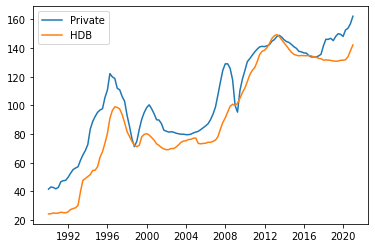

In [2]:
filePath = r"C:/Users/USER/Documents/GitHub/trading/Notebooks/data/HousingPriceIndex_SG.xlsx"
# Download of singapore housing price index data: https://data.gov.sg/dataset/hdb-resale-price-index
SG_HousingPriceIndex = pd.read_excel(filePath)
# Change time to date-time and plot
qs = SG_HousingPriceIndex['Time'].str.replace(r'(Q\d) (\d+)', r'\2-\1')
SG_HousingPriceIndex['Time'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
SG_HousingPriceIndex['Time'] = pd.to_datetime(SG_HousingPriceIndex['Time'])
SG_HousingPriceIndex.index = pd.to_datetime(SG_HousingPriceIndex['Time'])

plt.plot(SG_HousingPriceIndex['Time'], SG_HousingPriceIndex['Private'],SG_HousingPriceIndex['Time'], SG_HousingPriceIndex['HDB'])
plt.legend(['Private','HDB'])

## Currency Exchange Rate

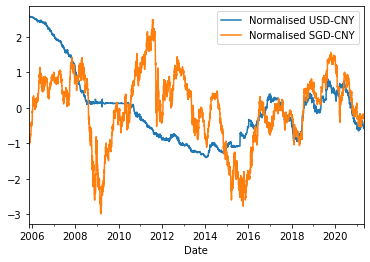

In [3]:
filePath = r"C:/Users/USER/Documents/GitHub/trading/Notebooks/data/exchangeRate.xlsx"
# Download of singapore housing price index data: https://data.gov.sg/dataset/hdb-resale-price-index
exchangeRate = pd.read_excel(filePath)[2500:-1]
#exchangeRate = exchangeRate[2500:-1]
exchangeRate.replace({'0':np.nan, 0:np.nan})
exchangeRate.index = pd.to_datetime(exchangeRate['Date'])
((exchangeRate['USD-CNY'] - exchangeRate['USD-CNY'].mean())/exchangeRate['USD-CNY'].std()).plot()
((exchangeRate['SGD-CNY'] - exchangeRate['SGD-CNY'].mean())/exchangeRate['SGD-CNY'].std()).plot()
#((exchangeRate['USD-SGD'] - exchangeRate['USD-SGD'].mean())/exchangeRate['USD-SGD'].std()).plot()

#plt.legend(['Normalised USD-CNY','Normalised SGD-CNY','Normalised USD-SGD'])
plt.legend(['Normalised USD-CNY','Normalised SGD-CNY'])

***
## 各股市指数

^DJI: Dow Jones Industrial Average道指  
^IXIC: Nasdaq Composite Index 纳指  
^GSPC: 标普500    
^RUT: Russell 2000 Index 罗素2000  
000001.SS: 上证指数  
399001.SZ: 深证成指  
^HSI: Hang Seng Index恒生指数  
^STI: Straits Times Index海指  
^BTC-USD: Bitcoin to USD
^TNX: US interest rate
^DX-Y.NYB: US dollar index
Reference：https://finance.yahoo.com/world-indices/

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


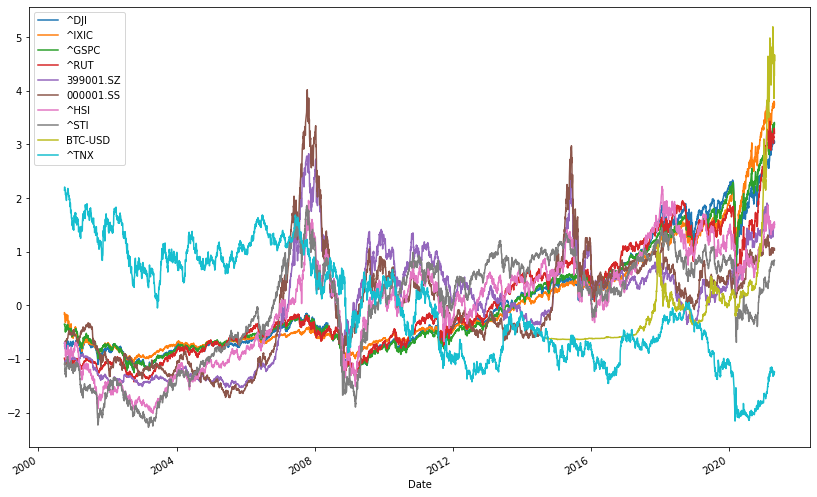

In [4]:
yf.pdr_override() 
start = dt.datetime(2000,10,1) #set start point of dataframe
now = dt.datetime.now() #set end point of dataframe

stocklst = ['^DJI','^IXIC','^GSPC','^RUT','399001.SZ','000001.SS','^HSI','^STI','BTC-USD','^TNX'] #set stock we are looking
#stocklst = ['^DJI','^RUT','BTC-USD','^TNX','DX-Y.NYB'] #set stock we are looking

for stock in stocklst:
    df = pdr.get_data_yahoo(stock,start,now)
    ((df['Close']-df['Close'].mean())/df['Close'].std()).plot(label = 'close',figsize = (14,9))
    #((df['Close']-df['Close'].mean())).plot(label = 'close',figsize = (14,9))
#plt.plot(fedFundsRate['date'][24000:],(fedFundsRate['value'][24000:]-fedFundsRate['value'][24000:].mean())/fedFundsRate['value'][24000:].std())
plt.legend(stocklst)

***
## 股市 + GDP / FX 指数

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


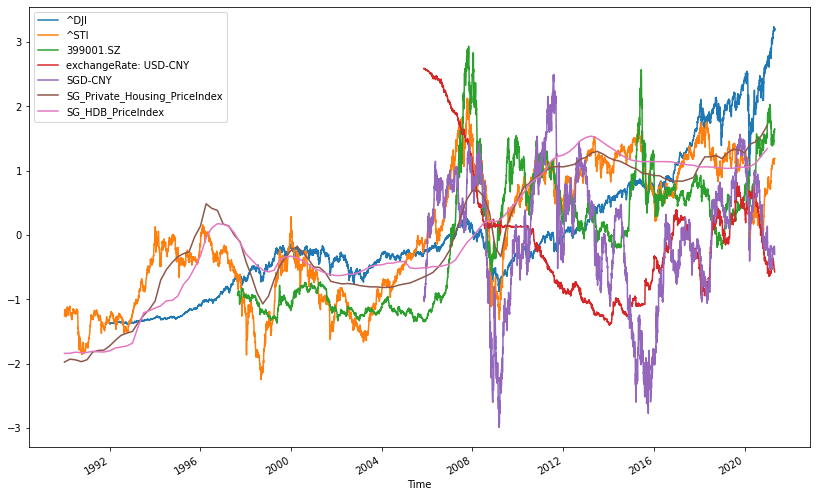

In [5]:
yf.pdr_override() 
start = dt.datetime(1990,1,1) #set start point of dataframe
now = dt.datetime.now() #set end point of dataframe


#stocklst = ['^DJI','^IXIC','^GSPC','^RUT','399001.SZ','000001.SS','^HSI','^STI','BTC-USD'] #set stock we are looking
stocklst = ['^DJI','^STI','399001.SZ'] #set stock we are looking
for stock in stocklst:
    df = pdr.get_data_yahoo(stock,start,now)
    ((df['Close']-df['Close'].mean())/df['Close'].std()).plot(label = 'close',figsize = (14,9))

((exchangeRate['USD-CNY'] - exchangeRate['USD-CNY'].mean())/exchangeRate['USD-CNY'].std()).plot()
((exchangeRate['SGD-CNY'] - exchangeRate['SGD-CNY'].mean())/exchangeRate['SGD-CNY'].std()).plot()
((SG_HousingPriceIndex['Private']-SG_HousingPriceIndex['Private'].mean())/SG_HousingPriceIndex['Private'].std()).plot()
((SG_HousingPriceIndex['HDB']-SG_HousingPriceIndex['HDB'].mean())/SG_HousingPriceIndex['HDB'].std()).plot(x='datetime')

legendlst = stocklst + ['exchangeRate: USD-CNY','SGD-CNY','SG_Private_Housing_PriceIndex','SG_HDB_PriceIndex']
plt.legend(legendlst)